In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import librosa

from shared.utils import *
from shared.local_path import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Data Preparation & Preprocessing
## Audio Data

In [2]:
os.path.join(AUDIO_PATH, 'angry', '03-01-05-01-01-01-01.wav')

'E:\\\\Skripsi\\data\\audio\\angry\\03-01-05-01-01-01-01.wav'

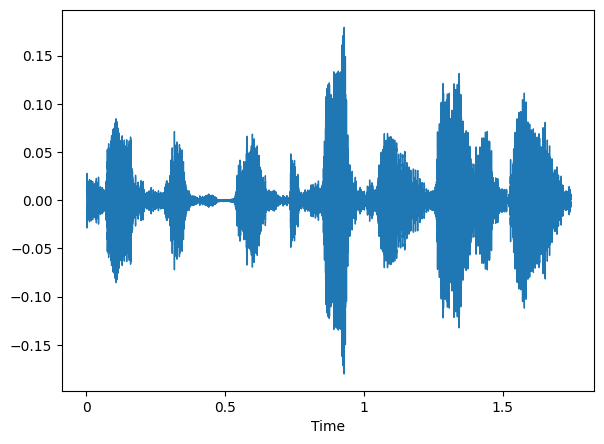

In [3]:
dummy_audio = os.path.join(AUDIO_PATH, 'angry', '03-01-05-01-01-01-01.wav')
dummy, sr = load_audio(dummy_audio, 32_000)
librosa.display.waveshow(dummy, sr=sr)
plt.tight_layout(pad=2)
plt.show()


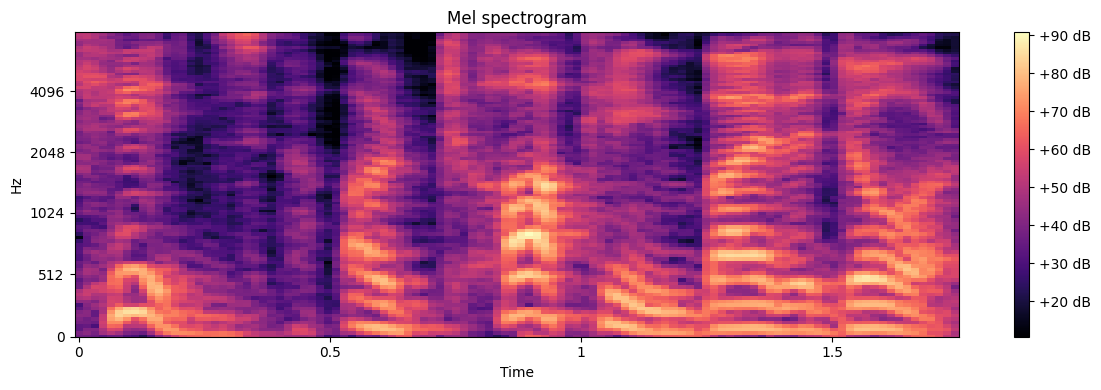

In [4]:
spectogram = preprocess_audio(dummy_audio, 32_000)

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectogram[:, :, 0], sr=32000, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 8000)
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


In [5]:
label = []
filepath = []
data = []

for classes in os.listdir(AUDIO_PATH):
    for file in os.listdir(os.path.join(AUDIO_PATH, classes)):
        file_path = os.path.join(AUDIO_PATH, classes, file)
        spectrogram = preprocess_audio(file_path)

        filepath.append(file_path)
        data.append(spectrogram)
        label.append(classes)

audio = pd.DataFrame({
    'filepath': filepath,
    'label': label,
    'data': data,
})

audio.head()

C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=96
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1472
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1056
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1792
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=320
  warnings.w

,filepath,label,data
0,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,"[[[37.24952, 37.24952, 37.24952], [37.200745, ..."
1,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,"[[[37.24952, 37.24952, 37.24952], [37.200745, ..."
2,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,"[[[44.247833, 44.247833, 44.247833], [45.21157..."
3,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,"[[[31.916271, 31.916271, 31.916271], [37.21556..."
4,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,"[[[31.916271, 31.916271, 31.916271], [37.21556..."


In [6]:
aud_train, aud_temp = train_test_split(audio, test_size=0.4, stratify=audio['label'], random_state=42)
aud_val, aud_test = train_test_split(aud_temp, test_size=0.5, stratify=aud_temp['label'], random_state=42)
del aud_temp

In [7]:
aud_val.head()

,filepath,label,data
19109,E:\\Skripsi\data\audio\neutral\1039_TSI_NEU_XX...,neutral,"[[[41.52285, 41.52285, 41.52285], [45.856525, ..."
21523,E:\\Skripsi\data\audio\neutral\YAF_witch_neutr...,neutral,"[[[32.088146, 32.088146, 32.088146], [33.34525..."
6322,E:\\Skripsi\data\audio\disgust\1026_IEO_DIS_LO...,disgust,"[[[42.24244, 42.24244, 42.24244], [48.99986, 4..."
18864,E:\\Skripsi\data\audio\neutral\1029_TIE_NEU_XX...,neutral,"[[[42.998344, 42.998344, 42.998344], [50.81826..."
5658,E:\\Skripsi\data\audio\disgust\1006_IEO_DIS_HI...,disgust,"[[[43.95287, 43.95287, 43.95287], [45.338608, ..."


In [8]:
le = LabelEncoder()
le.fit(audio['label'])

aud_train['label_encoded'] = le.transform(aud_train['label'])
aud_val['label_encoded'] = le.transform(aud_val['label'])
aud_test['label_encoded'] = le.transform(aud_test['label'])

num_classes = len(le.classes_)
del audio

In [9]:
print(num_classes)
print(le.classes_)
aud_test.head()

8
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label,data,label_encoded
8964,E:\\Skripsi\data\audio\disgust\OAF_walk_disgus...,disgust,"[[[51.121334, 51.121334, 51.121334], [57.29680...",2
27179,E:\\Skripsi\data\audio\surprise\YAF_life_ps_pa...,surprise,"[[[32.09686, 32.09686, 32.09686], [29.439976, ...",7
19923,E:\\Skripsi\data\audio\neutral\1072_TAI_NEU_XX...,neutral,"[[[43.032803, 43.032803, 43.032803], [45.82954...",5
18488,E:\\Skripsi\data\audio\neutral\1014_IWL_NEU_XX...,neutral,"[[[34.131428, 34.131428, 34.131428], [34.71473...",5
12579,E:\\Skripsi\data\audio\fear\1088_ITH_FEA_XX_pa...,fear,"[[[53.940815, 53.940815, 53.940815], [60.06407...",3


## Image Data

In [10]:
classes = [x for x in os.listdir(TRAIN_IMAGE_PATH)]
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

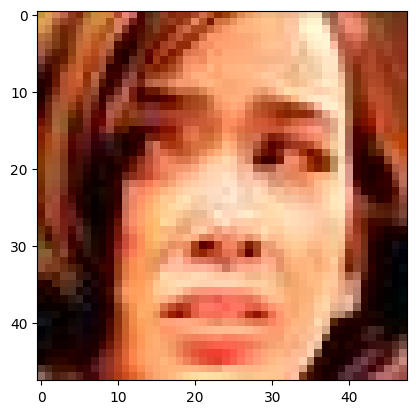

In [11]:
test_image = os.path.join(TRAIN_IMAGE_PATH, 'disgust', 'Training_659019.jpg')

img = cv2.imread(test_image, cv2.IMREAD_COLOR_RGB)
plt.imshow(img)

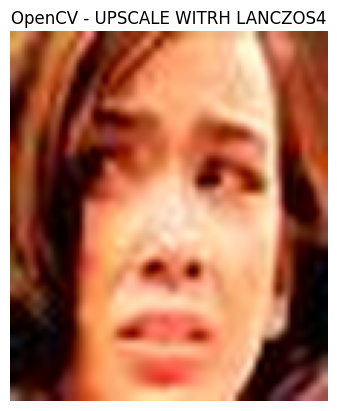

In [12]:
test_data = preprocess_image(test_image)
plt.imshow(test_data)
plt.title("OpenCV - UPSCALE WITRH LANCZOS4")
plt.axis("off")
plt.show()

In [13]:
filepath = []
label = []

i = 0
for classes in os.listdir(TRAIN_IMAGE_PATH):
    for file in os.listdir(os.path.join(TRAIN_IMAGE_PATH, classes)):
        path = os.path.join(TRAIN_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

train_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(train_df.shape)
print(train_df['label'].unique())
train_df.head()

(28709, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\train\angry\Training...,angry
1,E:\\Skripsi\data\new_data\train\angry\Training...,angry
2,E:\\Skripsi\data\new_data\train\angry\Training...,angry
3,E:\\Skripsi\data\new_data\train\angry\Training...,angry
4,E:\\Skripsi\data\new_data\train\angry\Training...,angry


In [14]:
filepath = []
label = []

i = 0
for classes in os.listdir(TEST_IMAGE_PATH):
    for file in os.listdir(os.path.join(TEST_IMAGE_PATH, classes)):
        path = os.path.join(TEST_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

img_test_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(img_test_df.shape)
print(img_test_df['label'].unique())
img_test_df.head()

(7311, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\test\angry\Anger.jpg,angry
1,E:\\Skripsi\data\new_data\test\angry\Anger_1.jpg,angry
2,E:\\Skripsi\data\new_data\test\angry\Anger_10.jpg,angry
3,E:\\Skripsi\data\new_data\test\angry\Anger_11.jpg,angry
4,E:\\Skripsi\data\new_data\test\angry\Anger_12.jpg,angry


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  28709 non-null  object
 1   label     28709 non-null  object
dtypes: object(2)
memory usage: 448.7+ KB


In [16]:
train_df['data'] = train_df['filepath'].apply(preprocess_image)
img_test_df['data'] = img_test_df['filepath'].apply(preprocess_image)

In [17]:
train_df.head()

,filepath,label,data
0,E:\\Skripsi\data\new_data\train\angry\Training...,angry,"[[[77, 52, 47], [73, 48, 42], [62, 37, 31], [4..."
1,E:\\Skripsi\data\new_data\train\angry\Training...,angry,"[[[21, 16, 20], [24, 19, 23], [29, 25, 29], [3..."
2,E:\\Skripsi\data\new_data\train\angry\Training...,angry,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,E:\\Skripsi\data\new_data\train\angry\Training...,angry,"[[[179, 150, 136], [175, 146, 132], [167, 137,..."
4,E:\\Skripsi\data\new_data\train\angry\Training...,angry,"[[[224, 207, 192], [224, 208, 192], [226, 210,..."


In [18]:
import random
random_index = random.randint(0, len(train_df) - 1)
random_row = train_df.iloc[[random_index]]

In [19]:
type(random_row.data.values)
random_row.data.values[0].shape

(128, 110, 3)

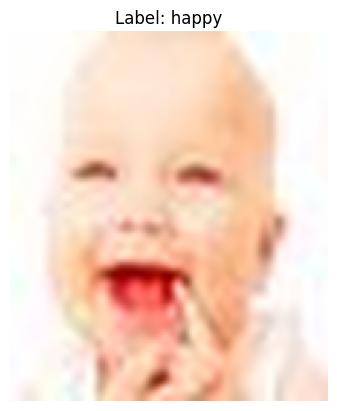

In [20]:
image_array = random_row.data.values[0]
plt.imshow(image_array)
plt.axis('off')
plt.title(f"Label: {random_row['label'].iloc[0]}")
plt.show()

In [21]:
le = LabelEncoder()
le.fit(train_df['label'])
train_df['label_encoded'] = le.transform(train_df['label'])
img_test_df['label_encoded'] = le.transform(img_test_df['label'])

In [22]:
img_train_df, img_val_df = train_test_split(train_df, test_size=.3, random_state=42)

del train_df

img_val_df.head()

,filepath,label,data,label_encoded
4974,E:\\Skripsi\data\new_data\train\fear\Training_...,fear,"[[[78, 76, 68], [65, 62, 55], [38, 37, 31], [1...",2
11509,E:\\Skripsi\data\new_data\train\happy\Training...,happy,"[[[60, 33, 26], [58, 31, 24], [53, 27, 20], [4...",3
27921,E:\\Skripsi\data\new_data\train\surprise\Train...,surprise,"[[[247, 255, 255], [248, 255, 255], [248, 255,...",6
4981,E:\\Skripsi\data\new_data\train\fear\Training_...,fear,"[[[94, 65, 58], [96, 67, 61], [104, 77, 72], [...",2
27982,E:\\Skripsi\data\new_data\train\surprise\Train...,surprise,"[[[48, 27, 26], [47, 26, 25], [48, 25, 25], [5...",6


### find the data shape

In [23]:
print(image_array.shape)
print(spectogram.shape)

(128, 110, 3)
(128, 110, 3)


# Modeling

In [24]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', pooling="max", input_shape=(256, 110, 3))

In [25]:
input_image = tf.keras.layers.Input(shape=(128, 110, 3), name='input_image')
input_audio = tf.keras.layers.Input(shape=(128, 110, 3), name='input_audio')

inputs = tf.keras.layers.Concatenate(axis=1)([input_image, input_audio])

x1 = base_model(inputs)
flat = tf.keras.layers.Flatten()(x1)
fc1 = tf.keras.layers.Dense(512, activation='relu')(flat)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)

out1 = tf.keras.layers.Dense(8, activation='softmax', name='image_class')(fc2)
out2 = tf.keras.layers.Dense(7, activation='softmax', name='audio_class')(fc2)

model = tf.keras.models.Model(inputs=[input_image, input_audio], outputs=[out1, out2])

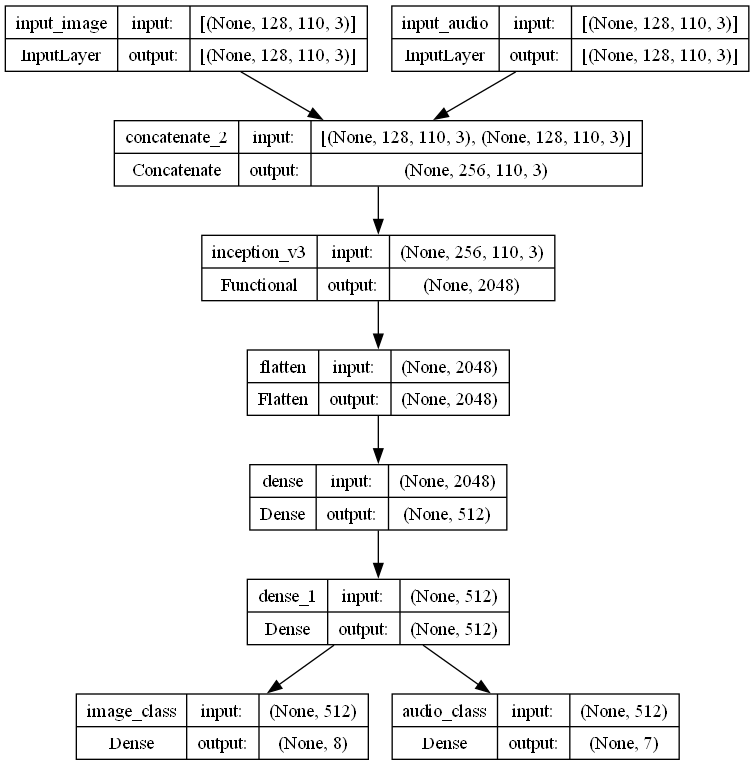

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'image_class': 'categorical_crossentropy',
        'audio_class': 'categorical_crossentropy'
    },
    metrics={
        'image_class': 'accuracy',
        'audio_class': 'accuracy' 
    }
)

In [28]:
all_same_shape = all(x.shape == (128, 110, 3) for x in aud_train.data.values)
print(all_same_shape)

True


In [42]:
img_train_data = np.stack(img_train_df.data.values) 
aud_train_data = np.stack(aud_train.data.values) 

img_val_data = np.stack(img_val_df.data.values) 
aud_val_data = np.stack(aud_val.data.values) 

img_train_labels = np.array(img_train_df.label_encoded.values)  
aud_train_labels = np.array(aud_train.label_encoded.values)  

img_val_labels = np.array(img_val_df.label_encoded.values) 
aud_val_labels = np.array(aud_val.label_encoded.values) 


MemoryError: Unable to allocate 810. MiB for an array with shape (20096, 128, 110, 3) and data type uint8

In [39]:
len(img_train_data) == len(img_train_labels)

False

In [40]:
print(len(img_train_data))
print(len(img_train_labels))

2572288
20096


In [41]:
img_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20096 entries, 14421 to 23654
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filepath       20096 non-null  object
 1   label          20096 non-null  object
 2   data           20096 non-null  object
 3   label_encoded  20096 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 706.5+ KB


In [32]:
min_samples = min(img_train_data.shape[0], aud_train_data.shape[0])

img_train_data = img_train_data[:min_samples]
aud_train_data = aud_train_data[:min_samples]

img_train_labels = img_train_labels[:min_samples]
aud_train_labels = aud_train_labels[:min_samples]

print(img_train_data.shape) 
print(aud_train_data.shape)  
print(img_train_labels.shape) 
print(aud_train_labels.shape) 


(2104704, 110, 3)
(2104704, 110, 3)
(20096,)
(16443,)


In [31]:
history = model.fit(
    x=[img_train_data, aud_train_data],
    y=[img_train_labels, aud_train_labels], 
    validation_data=(
        [img_val_data, aud_val_data], 
        [img_val_labels, aud_val_labels]  
    ),
    epochs=10, 
    batch_size=32  
)


ValueError: Data cardinality is ambiguous:
  x sizes: 2572288, 2104704
  y sizes: 20096, 16443
Make sure all arrays contain the same number of samples.